### Importing data to this colab session

In [1]:
!gdown 1m8MitvFHu4zwNAEh5z3LscuQeIzKHsX-

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!gdown 1ojNQdQJejpn473LiRk79bhz1XvvWigJQ

'gdown' is not recognized as an internal or external command,
operable program or batch file.


### Import Libraries

Here are some needed libraries

In [3]:
"""
  Attention :
      if you get an error in this section, you need to restart runtime,
      because of installation new package named 'dython'
"""

import sys
import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import sklearn 
!pip install dython
import dython

### Load data modeling Libraries

In [4]:
#Common Model Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Common Model Helpers
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Getting familiar to data

We need to import the data and do some minor cleanups.

In [5]:
df_train = pd.read_csv("/content/Adult_TrainDataset.csv",
                 na_values="?" )
df_train.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Adult_TrainDataset.csv'

In [ ]:
df_test = pd.read_csv("/content/Adult_TestDataset.csv",
                 na_values="?" )
df_test.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


Now we want to see what data types we have:

In [ ]:
df_train.dtypes

Age                  int64
Work_Class          object
Final_Weight         int64
Education           object
Education-Number     int64
Marital_Status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Capital_Gain         int64
Capital_Loss         int64
Hours-Per-Week       int64
Native_Country      object
Income              object
dtype: object

In [ ]:
df_test.dtypes

Age                  int64
Work_Class          object
Final_Weight         int64
Education           object
Education-Number     int64
Marital_Status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Capital_Gain         int64
Capital_Loss         int64
Hours-Per-Week       int64
Native_Country      object
Income              object
dtype: object

Here we check info of our data

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work_Class        30725 non-null  object
 2   Final_Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-Number  32561 non-null  int64 
 5   Marital_Status    32561 non-null  object
 6   Occupation        30718 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital_Gain      32561 non-null  int64 
 11  Capital_Loss      32561 non-null  int64 
 12  Hours-Per-Week    32561 non-null  int64 
 13  Native_Country    31978 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               16281 non-null  int64 
 1   Work_Class        15318 non-null  object
 2   Final_Weight      16281 non-null  int64 
 3   Education         16281 non-null  object
 4   Education-Number  16281 non-null  int64 
 5   Marital_Status    16281 non-null  object
 6   Occupation        15315 non-null  object
 7   Relationship      16281 non-null  object
 8   Race              16281 non-null  object
 9   Sex               16281 non-null  object
 10  Capital_Gain      16281 non-null  int64 
 11  Capital_Loss      16281 non-null  int64 
 12  Hours-Per-Week    16281 non-null  int64 
 13  Native_Country    16007 non-null  object
 14  Income            16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Here we check dimensions of our data

In [ ]:
df_train.shape

(32561, 15)

In [ ]:
df_test.shape

(16281, 15)

Here we use describe method to check some statistics related information about our data 

In [ ]:
df_train.describe()

,Age,Final_Weight,Education-Number,Capital_Gain,Capital_Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Here we check number of different values of each feature in our data

In [ ]:
for col in df_train.columns:
    print(col, df_train[col].nunique())

Age 73
Work_Class 8
Final_Weight 21648
Education 16
Education-Number 16
Marital_Status 7
Occupation 14
Relationship 6
Race 5
Sex 2
Capital_Gain 119
Capital_Loss 92
Hours-Per-Week 94
Native_Country 41
Income 2


Here we convert our target column content to binary format for better understanding by the models

In [ ]:
df_train = df_train.replace({"<=50K":0,">50K":1})

In [ ]:
df_test = df_test.replace({"<=50K":0,">50K":1})

Here we count number of records in each class 

In [ ]:
print(df_train.Income.value_counts())

0    24720
1     7841
Name: Income, dtype: int64


### Exploratory Data Analysis

Here we want to do some visualization to get general information about our data

In this plot we see the distribution of our Target Values 

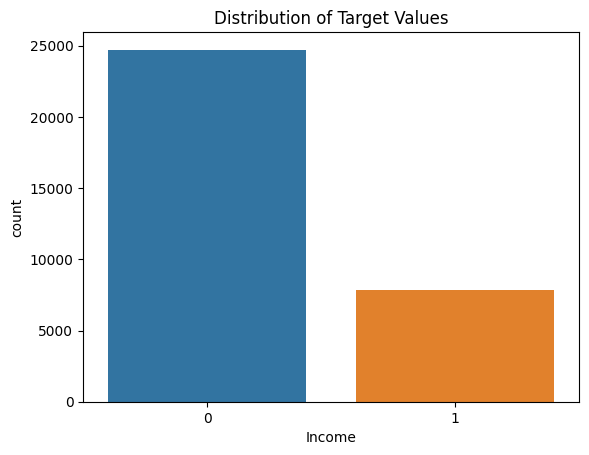

In [ ]:
sns.countplot(x = "Income", data = df_train)
plt.title("Distribution of Target Values")
plt.show()

In below plot we want to show different values of Education feature with respect to their class, so two different colors shows us distribution of our two classes on each value of this feature

Text(0.5, 1.0, 'Education VS. Income')

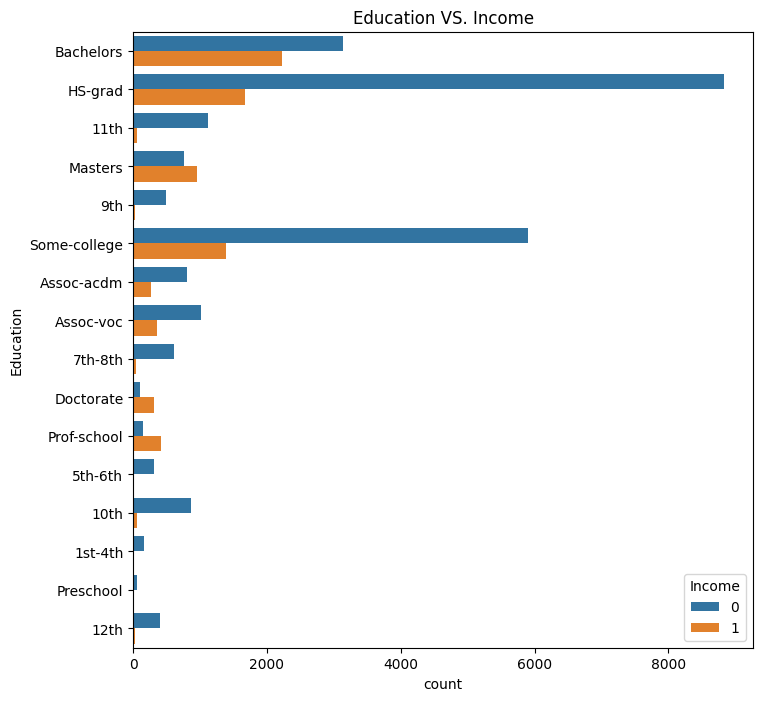

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y= df_train['Education'], hue = df_train['Income']).set_title('Education VS. Income')

Same as previous figure, In below plot we want to show different values of Marital_Status feature with respect to their class, so two different colors shows us distribution of our two classes on each value of this feature

Text(0.5, 1.0, 'Marital_Status VS. Income')

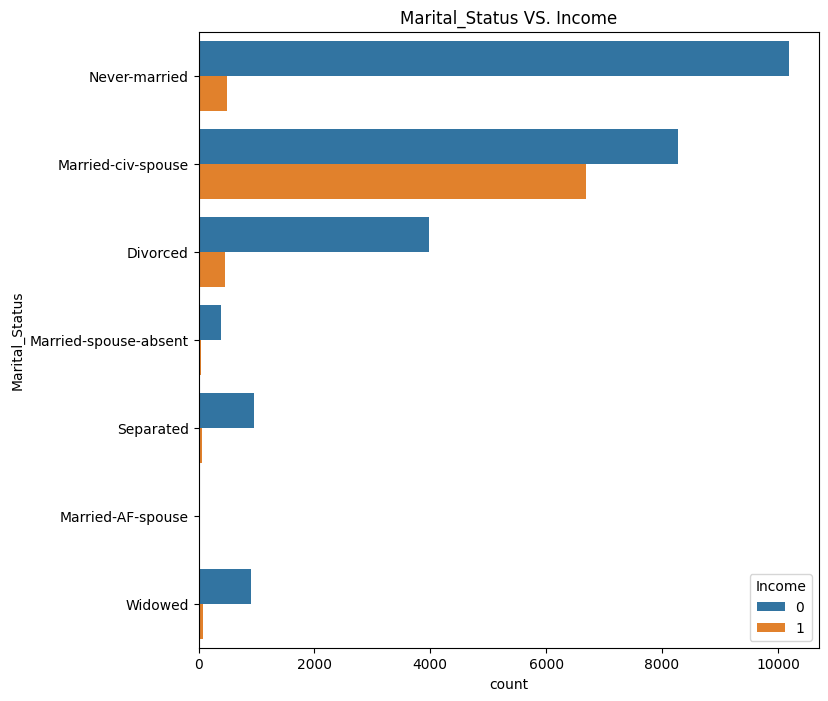

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y= df_train['Marital_Status'], hue = df_train['Income']).set_title('Marital_Status VS. Income')

Here we have the boxplot of our numeric features.
The plot displays a summary of the minimum, first quartile (Q1), median, third quartile (Q3), and maximum values of a dataset.

The box in the plot represents the interquartile range (IQR), which is the range between the first and third quartiles. The line inside the box represents the median of the data. The whiskers, which extend from the box, represent the range of the data within 1.5 times the IQR from the first and third quartiles. Any data points outside of this range are considered outliers and are plotted as individual points.

<Axes: >

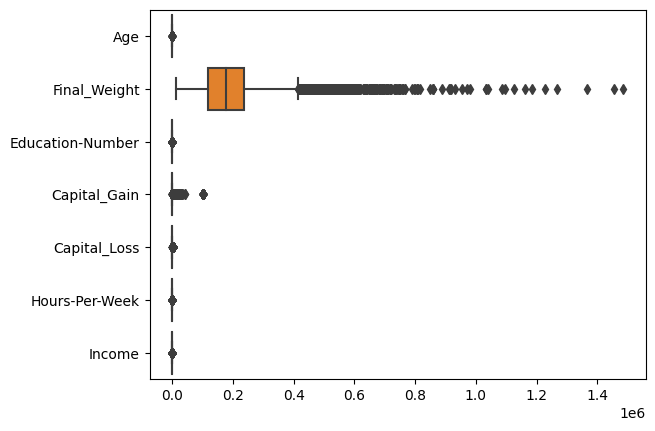

In [ ]:
sns.boxplot(data=df_train, orient='h')

This figure measures for us the similarity of numeric features with target value 

<ipython-input-77-92100c4b5981>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.drop('Income', axis=1).corrwith(df_train.Income).plot(kind='bar', grid=True, title="Correlation of Features with target", color="cornflowerblue");


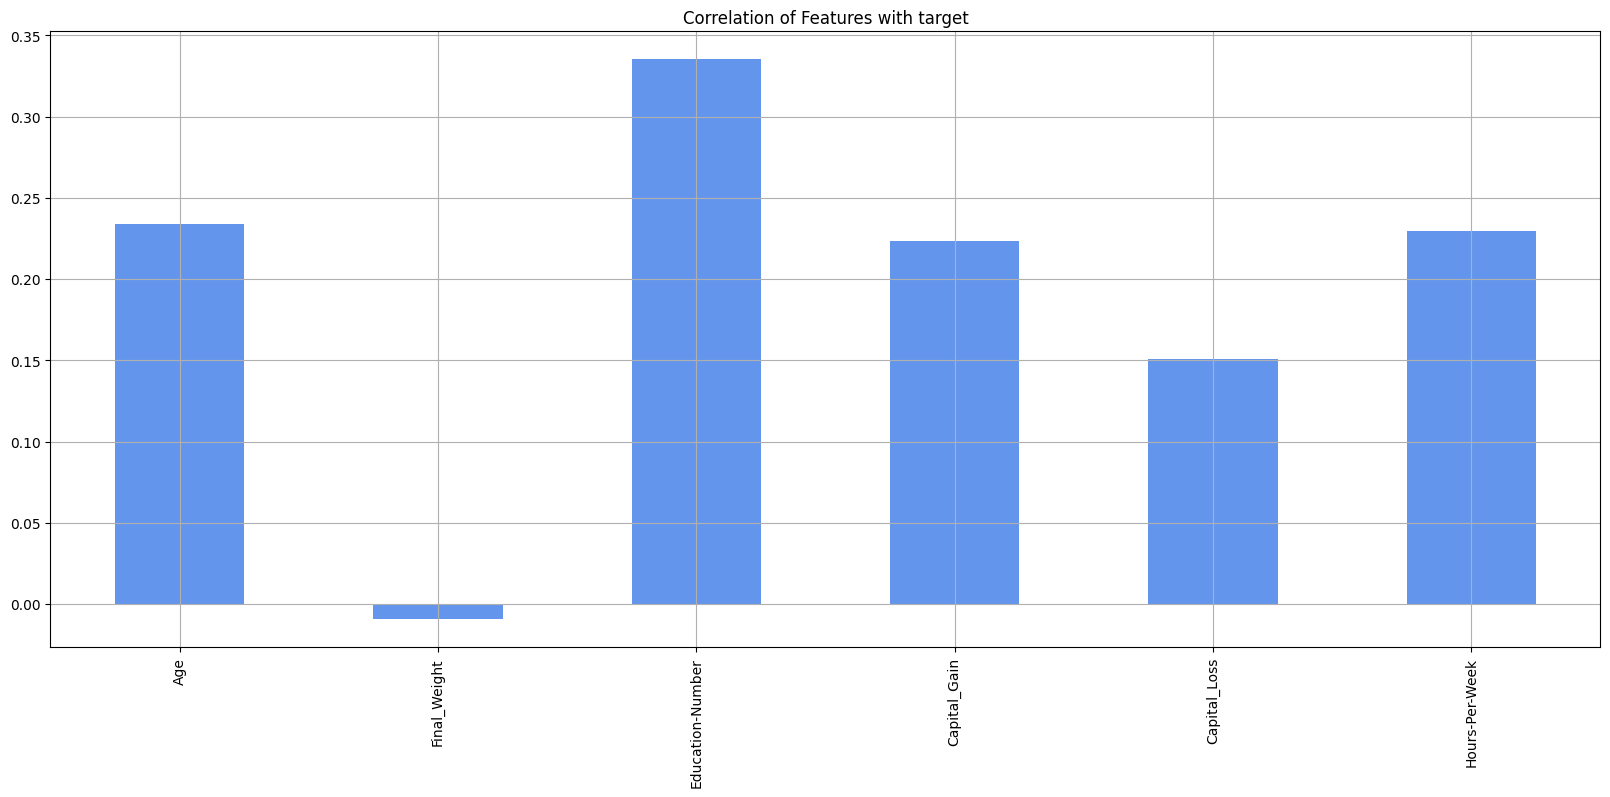

In [ ]:
plt.figure(figsize=(20, 8))
df_train.drop('Income', axis=1).corrwith(df_train.Income).plot(kind='bar', grid=True, title="Correlation of Features with target", color="cornflowerblue");

Here we plotted the scatter matrix of numeric values of our dataset.
It represents the pairwise relationships among multiple variables in our dataset. It is used here to visualize the correlation or association between multiple variables at once.
In this scatter matrix, each variable is plotted against every other variable in a scatter plot. The diagonal of the matrix shows the distribution of each variable. The off-diagonal plots show the relationship between two variables, with each point in the plot representing a data point for those two variables.

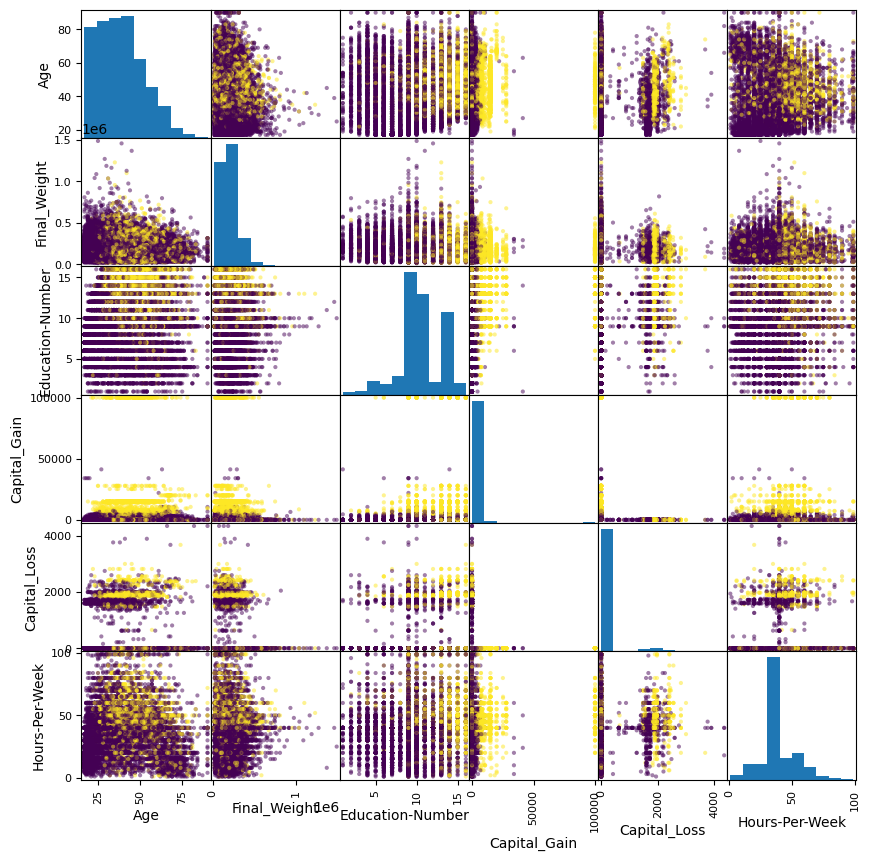

In [ ]:
pd.plotting.scatter_matrix(
    df_train[['Age', 'Final_Weight','Education-Number', 'Capital_Gain','Capital_Loss','Hours-Per-Week']],
    c=df_train['Income'], figsize=(10, 10));

Here we have heatmap matrix which shows us pairwise correlation of our numeric features with a number which exactly make it clear for us this similarity

<ipython-input-79-6c26006d49be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()  # Correlation Matrix


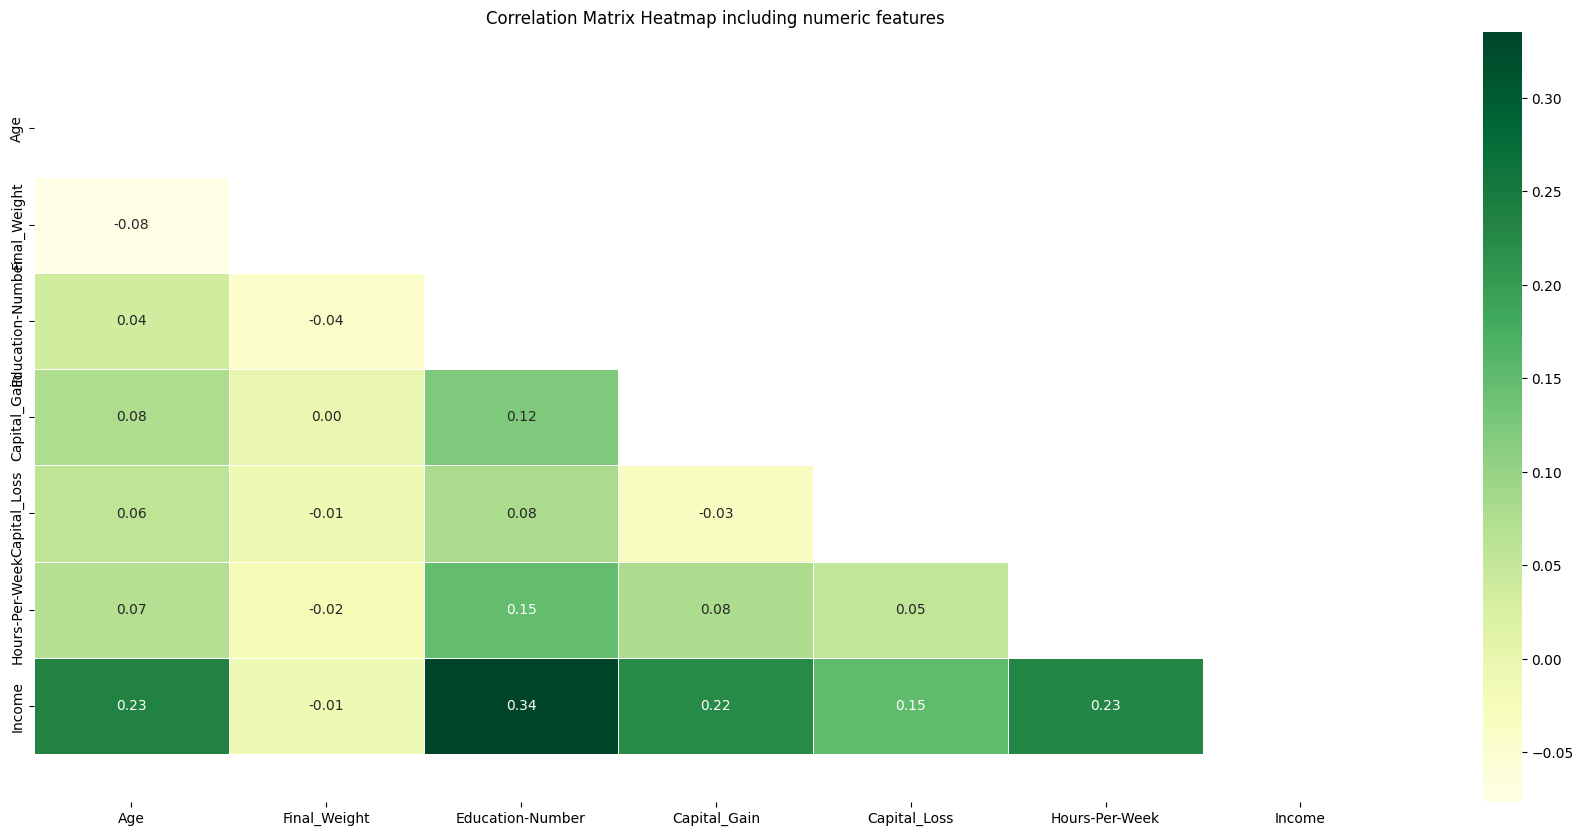

In [ ]:
corr_matrix = df_train.corr()  # Correlation Matrix

# Mask for Heatmap
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(corr_matrix)] = True

# Correlation Matrix Heatmap including all features
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_title("Correlation Matrix Heatmap including numeric features");

Here we have heatmap for all of our features and can give us wider insight to our data compare to previous heatmap which was only for numeric ones

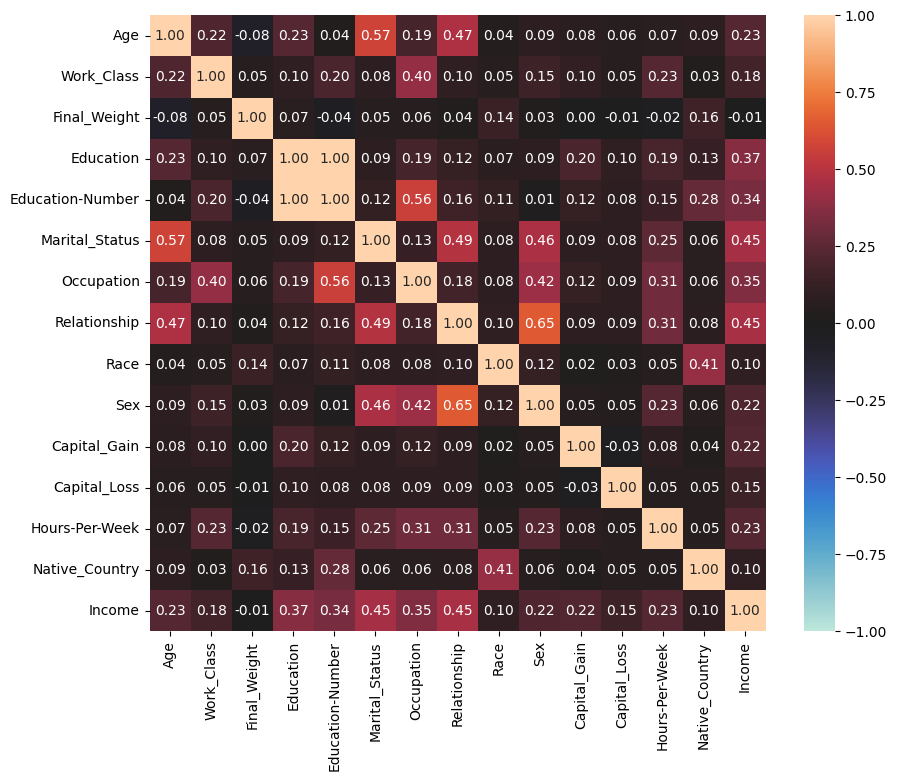

{'corr':                        Age  Work_Class  Final_Weight  Education  \
 Age               1.000000    0.218365     -0.076646   0.229077   
 Work_Class        0.218365    1.000000      0.052620   0.097035   
 Final_Weight     -0.076646    0.052620      1.000000   0.067111   
 Education         0.229077    0.097035      0.067111   1.000000   
 Education-Number  0.036527    0.197346     -0.043195   1.000000   
 Marital_Status    0.573546    0.083612      0.054406   0.089027   
 Occupation        0.186472    0.399504      0.055344   0.186141   
 Relationship      0.474219    0.097467      0.037277   0.120770   
 Race              0.043588    0.054056      0.140456   0.071763   
 Sex               0.088832    0.152871      0.026858   0.093182   
 Capital_Gain      0.077674    0.104268      0.000432   0.197873   
 Capital_Loss      0.057775    0.046975     -0.010252   0.099203   
 Hours-Per-Week    0.068756    0.228189     -0.018768   0.194284   
 Native_Country    0.088367    0.028974 

In [ ]:
from dython.nominal import associations
associations(df_train, figsize=(10,8))

In above plot we saw that two features "Education" and "Education-Number" are completely correlated which tells us that "Education-Number" is the encoded column derivated from "Education" column and we can remove "Education" from our feature list

In [ ]:
df_train = df_train.drop(columns='Education')

In [ ]:
df_test = df_test.drop(columns='Education')

### Dealing with null values

There are a couple of null values in the data that we need to clean up.

In [ ]:
df_train[df_train.isnull().any(axis=1)]

,Age,Work_Class,Final_Weight,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
14,40,Private,121772,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,1
27,54,NaN,180211,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
38,31,Private,84154,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,1
51,18,Private,226956,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,0
61,32,NaN,293936,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
32531,30,NaN,33811,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32539,71,NaN,287372,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
32541,41,NaN,202822,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


In [ ]:
for col_name in df_train.columns: 
    print ("column:",col_name,".Missing:",sum(df_train[col_name].isnull()))

column: Age .Missing: 0
column: Work_Class .Missing: 1836
column: Final_Weight .Missing: 0
column: Education-Number .Missing: 0
column: Marital_Status .Missing: 0
column: Occupation .Missing: 1843
column: Relationship .Missing: 0
column: Race .Missing: 0
column: Sex .Missing: 0
column: Capital_Gain .Missing: 0
column: Capital_Loss .Missing: 0
column: Hours-Per-Week .Missing: 0
column: Native_Country .Missing: 583
column: Income .Missing: 0


In [ ]:
for col_name in df_test.columns: 
    print ("column:",col_name,".Missing:",sum(df_test[col_name].isnull()))

column: Age .Missing: 0
column: Work_Class .Missing: 963
column: Final_Weight .Missing: 0
column: Education-Number .Missing: 0
column: Marital_Status .Missing: 0
column: Occupation .Missing: 966
column: Relationship .Missing: 0
column: Race .Missing: 0
column: Sex .Missing: 0
column: Capital_Gain .Missing: 0
column: Capital_Loss .Missing: 0
column: Hours-Per-Week .Missing: 0
column: Native_Country .Missing: 274
column: Income .Missing: 0


In [ ]:
for col_name in df_train.columns:
  if df_train[col_name].isnull().values.any():
    df_train[col_name] = df_train[col_name].fillna(df_train[col_name].mode()[0])


In [ ]:
for col_name in df_train.columns:
  if df_test[col_name].isnull().values.any():
    df_test[col_name] = df_test[col_name].fillna(df_test[col_name].mode()[0])


### Normalizing and Standardizing the data

In [ ]:
df_train_numeric_columns = df_train.select_dtypes(include=[np.number]).columns
df_train_numeric_columns_except_Education_Number = df_train_numeric_columns[~df_train_numeric_columns.isin(['Education-Number', 'Income'])]
df_test_numeric_columns = df_test.select_dtypes(include=[np.number]).columns
df_test_numeric_columns_except_Education_Number = df_test_numeric_columns[~df_test_numeric_columns.isin(['Education-Number', 'Income'])]
df_train_numeric_except_Education_Number = df_train[df_train_numeric_columns_except_Education_Number]
df_test_numeric_except_Education_Number = df_test[df_test_numeric_columns_except_Education_Number]
scaler = StandardScaler()
scaler.fit(df_train_numeric_except_Education_Number)
df_train_numeric_scaled = scaler.transform(df_train_numeric_except_Education_Number)
df_train[df_train_numeric_columns_except_Education_Number] = df_train_numeric_scaled
df_test_numeric_scaled = scaler.transform(df_test_numeric_except_Education_Number)
df_test[df_test_numeric_columns_except_Education_Number] = df_test_numeric_scaled
df_train.head()
df_test.head()

,Age,Work_Class,Final_Weight,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,-0.995706,Private,0.350774,7,Never-married,Machine-op-inspct,Own-child,Black,Male,-0.145920,-0.21666,-0.035429,United-States,0
1,-0.042642,Private,-0.947095,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,-0.145920,-0.21666,0.774468,United-States,0
2,-0.775768,Local-gov,1.394362,12,Married-civ-spouse,Protective-serv,Husband,White,Male,-0.145920,-0.21666,-0.035429,United-States,1
3,0.397233,Private,-0.279070,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.895083,-0.21666,-0.035429,United-States,1
4,-1.508894,Private,-0.817458,10,Never-married,Prof-specialty,Own-child,White,Female,-0.145920,-0.21666,-0.845327,United-States,0


### Removing the outliers

In [ ]:
numeric_columns = ['Age', 'Final_Weight', 'Capital_Gain', 'Capital_Loss', 'Hours-Per-Week']

temp_mask_df = df_train.copy(deep=True)

for col in numeric_columns:
  lower_bound = temp_mask_df[col].quantile(0.01)
  upper_bound = temp_mask_df[col].quantile(0.99)
  temp_mask_df[col] = temp_mask_df[col].apply(lambda x: (x<lower_bound) or (x>upper_bound))


temp_mask_df = temp_mask_df[numeric_columns].any(axis=1)

df_train = df_train[~temp_mask_df]

Here, we remove ALL rows that have at least one outlier among their features.

we choose 0.01 and 0.99 quantile of data as lower and upper bounds for non-outlier rows.

because of small count of train dataset rows, we tried to drop small size of dataset as outliers.

### Encoding the data

Number of missing values are not as much as we delete a column and as the missing value columns are categorical, we replaced its missing values with their mode

#### Label Encoding
One approach to encode categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number.
In this technique, each label is assigned a unique integer based on alphabetical ordering.

Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric values can be “misinterpreted” by the algorithms. For example, the value of 0 is obviously less than the value of 4 but does that really correspond to the data set in real life? Or does a data with label "4" have "4X" more weight in our calculations than one with label "1"?


#### One-Hot Encoding
One-Hot Encoding is a common alternative approach. the basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
this has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.


Another callenge of One-Hot Encoding is Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables. Dummy Variable Trap is a scenario in which variables are highly correlated to each other.

The Dummy Variable Trap leads to the problem known as multicollinearity. Multicollinearity occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression.

So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped.

#### When to use a Label Encoding vs. One Hot Encoding

##### We apply One-Hot Encoding when:

1- The categorical feature is not ordinal

2- The number of categorical features is less so one-hot encoding can be effectively applied


##### We apply Label Encoding when:

1- The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)

2- The number of categories is quite large as one-hot encoding can lead to high memory consumption

In [ ]:
df_train.head()

,Age,Work_Class,Final_Weight,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,0.030671,State-gov,-1.063611,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,0
1,0.837109,Self-emp-not-inc,-1.008707,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,0
2,-0.042642,Private,0.245079,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,0
3,1.057047,Private,0.425801,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,0
4,-0.775768,Private,1.408176,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,0


We loop through the columns, check if their data type is of type "object" and if it is so, we encode it using "fit_transform" method.

This can also be done with "transform" method that has "_classes" attribute which is useful for defining the order of values.

In [ ]:
# label_encoder = preprocessing.LabelEncoder()
# df_train_label_encoded = df_train
# df_test_label_encoded = df_test
# for col in df_train.select_dtypes(include=['object']).columns:
#     # fit this column labels
#     label_encoder.fit(df_train_label_encoded[col])

#     # transform this column labels to encoded labels
#     df_train_label_encoded[col] = label_encoder.transform(df_train_label_encoded[col])
#     df_test_label_encoded[col] = label_encoder.transform(df_test_label_encoded[col])

# print(df_train.head())
# print(df_train_label_encoded.head())

In [ ]:
# print(df_test.head())
# print(df_test_label_encoded.head())

because the only column with "object" data type that has some how order in it is the column named "Education", we only need to do label encoding on this column.
But as we said in previous parts Education was completely correlated with Education-Number and we removed Education in that section we mentioned before.

Because other columns don't have any order in their values, we don't do any label encoding on them and proceed to the more suitable encoding for them i.e. one-hot encoding.

# One-Hot encoding

In [ ]:
(df_test.columns == df_train.columns).all()

True

in above cell we make sure that our train and test DataFrames have same columns.

In [ ]:
new_columns_for_train = set()
new_columns_for_test = set()

df_train_copy = df_train.copy(deep=True)
df_test_copy = df_test.copy(deep=True)

for col in df_train_copy.select_dtypes(include=['object']).columns:
  one_hotted_train = pd.get_dummies(df_train_copy[col], prefix=col)

  dropped_sub_column_name = one_hotted_train.columns[-1]

  one_hotted_train = one_hotted_train.drop(dropped_sub_column_name, axis=1)
  df_train_copy = df_train_copy.drop(col, axis=1)

  new_columns_for_train.update(set(one_hotted_train))
  df_train_copy = pd.concat([df_train_copy, one_hotted_train], axis=1)

  one_hotted_test = pd.get_dummies(df_test_copy[col], prefix=col)
  one_hotted_test = one_hotted_test.drop(dropped_sub_column_name, axis=1)
  df_test_copy = df_test_copy.drop(col, axis=1)
  new_columns_for_test.update(set(one_hotted_test))
  df_test_copy = pd.concat([df_test_copy, one_hotted_test], axis=1)


In [ ]:
for lost_column in (new_columns_for_train - new_columns_for_test):
  df_test_copy[lost_column] = 0

In order to encode the ramaining columns, We iterated over them and get the encoded columns using pandas.get_dummies method.

As we said earlier, one challenge of one-hot encoding is the Dummy variable Trap in which the newly added columns have a high correlation with each other. in order to fix this problem we need to delete one of the newly added columns; so we did it for the last added column in each iteration.

After deleting the primary column that has been encoded, We concatenate the dataset and the encoded columns together.

We do the same thing for test data set.

In [ ]:
df_train_copy = df_train_copy.reindex(sorted(df_train_copy.columns), axis=1)
df_test_copy = df_test_copy.reindex(sorted(df_test_copy.columns), axis=1)

In [ ]:
(df_test_copy.columns == df_train_copy.columns).all()

True

in above cell we make sure that our train and test DataFrames have same columns after encoding with OneHot method.

here we convert to set and compare because pandas equality operation care order of elements.

In [ ]:
# # creating one hot encoder object 
# onehotencoder = OneHotEncoder()
# df_train_copy = df_train.copy(deep=True)
# df_test_copy = df_test.copy(deep=True)
# deleted_columns = []
# for col in df_train_copy.select_dtypes(include=['object']).columns:
#   print(col)
#   #reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
#   X = onehotencoder.fit_transform(df_train_copy[col].values.reshape(-1,1)).toarray()
#   #To add this back into the original dataframe 
#   dfOneHot = pd.DataFrame(X, columns = [col + "_" + str(i) for i in (df_train_copy[col].unique())]) 


#   df_train_copy = pd.concat([df_train_copy, dfOneHot], axis=1)
#   #droping the country column 
#   deleted_columns.append(df_train_copy.columns[-1])
#   df_train_copy = df_train_copy.drop(df_train_copy.columns[-1], axis=1)
#   #df_train_copy = df_train_copy.drop(columns=col+str(int(df_train_copy[col].nunique()-1)))
#   df_train_copy= df_train_copy.drop([col], axis=1) 
#   #printing to verify 
# print(df_train_copy.head())

# # now lets encode the test data

# for col in df_test_copy.select_dtypes(include=['object']).columns:
#   print(col)
#   #reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
#   X = onehotencoder.fit_transform(df_test_copy[col].values.reshape(-1,1)).toarray()
#   #To add this back into the original dataframe 
#   dfOneHot = pd.DataFrame(X, columns = [col + "_" + str(i) for i in (df_test_copy[col].unique())]) 


#   df_test_copy = pd.concat([df_test_copy, dfOneHot], axis=1)
#   #droping the country column 
#   #deleted_columns.append(df_test_copy.columns[-1])
  
#   #df_train_copy = df_train_copy.drop(columns=col+str(int(df_train_copy[col].nunique()-1)))
#   df_test_copy= df_test_copy.drop([col], axis=1) 
#   #printing to verify 
# print(df_train_copy.head())

# for col in deleted_columns:
#   if col in df_test_copy.columns:
#     df_test_copy = df_test_copy.drop(col, axis=1)


# the above section has been commented out, because it added some null values due to unknown issues. but still included to show the use of 'sklearn' for one-hot encoding.
In this section we iterated over the columns with data of type object in the train data set. We did one-hot encoding on them and then added new columns with names reffering to the specific value they represented.

As we said earlier, one challenge of one-hot encoding is the Dummy variable Trap in which the newly added columns have a high correlation with each other. in order to fix this problem we need to delete one of the newly added columns; so we did it for the last added column in each iteration and then stored the name of that column in an array named "deleted_columns".


In the next step we drop the primary column because it has now been encoded and is no longer needed to be in the data set.

We do the same for test data set but instead of deleting the last added column in each iteration, we delete the columns that were deleted in the train data set; That means the column names in deleted_columns array. So after the encoding, we check if any column with it's name equal to a column in deleted_columns exists, and if so, we drop that column.

### Modeling

In [ ]:
y_train = df_train_copy['Income']
x_train = df_train_copy.drop('Income', axis=1)

x_test = df_test_copy.drop('Income', axis=1)
y_test = df_test_copy['Income']

here we just seperate final features and labels for both train and test datasets.

##### SVM

In [ ]:
svc = SVC(kernel='linear')

In [ ]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

here we creaate and fit SVM model with linear kernel.

#### Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier()

dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

here we create and fit decision tree model.

#### KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

here we create and fit KNN model.

### Evaluation




In [ ]:
# Define the confusion matrix
def draw_confusion_matrix(_confusion_matrix):
  # confusion_matrix = np.array([[11567, 868], [1540, 2306]])

  fig, ax = plt.subplots(figsize=(4, 3))
  # Create the heatmap
  sns.heatmap(_confusion_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)

  # Add labels and title
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')

  # Show the plot
  plt.show()

In [ ]:
# initialize the predicted values

y_svm_predicted = svc.predict(x_test)

y_dt_predicted = dt_clf.predict(x_test)

y_knn_predicted = neigh.predict(x_test)

here we initialize the predicted values into different variables based on our 3 models.

In [ ]:
def make_evaluations(y_true, y_predicted):
  _metric_funcs = [accuracy_score, precision_score, recall_score, f1_score]

  return '\n'.join([
      f"{_metric.__name__}: {round(_metric(y_true, y_predicted), 2)*100} %" for _metric in _metric_funcs
  ])

here we define a function to make evaluations and return results as a printable string.

##### SVM

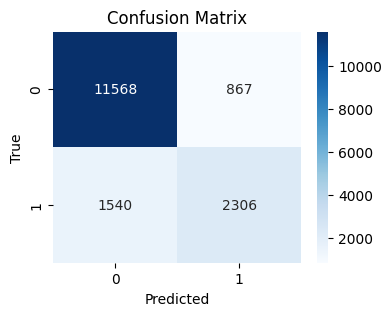

accuracy_score: 85.0 %
precision_score: 73.0 %
recall_score: 60.0 %
f1_score: 66.0 %


In [ ]:
draw_confusion_matrix(confusion_matrix(y_test, y_svm_predicted))
print(make_evaluations(y_test, y_svm_predicted))

in general, Linear kernel is better for data sets with lot of features

We ran the model using defferent kernels and the evaluation for each one is as follows:


Kernel: polynomial 

    [[11804   631]
     [ 1774  2072]]
    accuracy_score: 85.0 %
    precision_score: 77.0 %
    recall_score: 54.0 %
    f1_score: 63.0 %

Kernel: RBF

    [[11686   749]
     [ 1688  2158]]
    accuracy_score: 85.0 %
    precision_score: 74.0 %
    recall_score: 56.00000000000001 %
    f1_score: 64.0 %
    
Kernel: sigmoid

    [[9638 2797]
     [2970  876]]
    accuracy_score: 65.0 %
    precision_score: 24.0 %
    recall_score: 23.0 %
    f1_score: 23.0 %


So we see that linear kernel had better results over-all.

#### Decision Tree

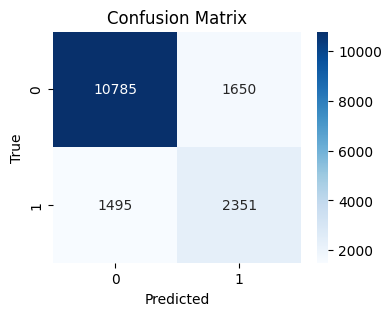

accuracy_score: 81.0 %
precision_score: 59.0 %
recall_score: 61.0 %
f1_score: 60.0 %


In [ ]:
draw_confusion_matrix(confusion_matrix(y_test, y_dt_predicted))
print(make_evaluations(y_test, y_dt_predicted))

In sklearn's decision tree model, three different criterions can be used: gini, entropy, and log_loss. We ran the model using these different criterions, the model above has been made using gini criterion which is the default value for the parameter; evaluation of the other two is shown below:


Criterion: entropy

    [[10857  1578]
     [ 1496  2350]]
    accuracy_score: 81.0 %
    precision_score: 60.0 %
    recall_score: 61.0 %
    f1_score: 60.0 %

Criterion: log_loss

    [[10851  1584]
     [ 1485  2361]]
    accuracy_score: 81.0 %
    precision_score: 60.0 %
    recall_score: 61.0 %
    f1_score: 61.0 %

So we see that model has better performance using log_loss as criterion.

#### KNN

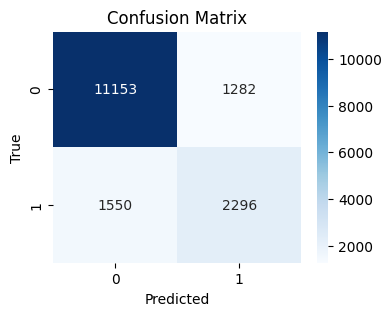

accuracy_score: 83.0 %
precision_score: 64.0 %
recall_score: 60.0 %
f1_score: 62.0 %


In [ ]:
draw_confusion_matrix(confusion_matrix(y_test, y_knn_predicted))
print(make_evaluations(y_test, y_knn_predicted))

We used different number_of_nabours to find the best parameter. The results are shown below:
We keep increasing the k value untill we reach the best evaluation results.


n_neighbors=5 

    [[11264  1171]
     [ 1546  2300]]
    accuracy_score: 83.0 %
    precision_score: 66.0 %
    recall_score: 60.0 %
    f1_score: 63.0 %

n_neighbors=7

    [[11302  1133]
     [ 1528  2318]]
    accuracy_score: 84.0 %
    precision_score: 67.0 %
    recall_score: 60.0 %
    f1_score: 64.0 %

n_neighbors=9

    [[11357  1078]
     [ 1538  2308]]
    accuracy_score: 84.0 %
    precision_score: 68.0 %
    recall_score: 60.0 %
    f1_score: 64.0 %

n_neighbors=11

    [[11388  1047]
     [ 1523  2323]]
    accuracy_score: 84.0 %
    precision_score: 69.0 %
    recall_score: 60.0 %
    f1_score: 64.0 %

n_neighbors=13

    [[11403  1032]
     [ 1525  2321]]
    accuracy_score: 84.0 %
    precision_score: 69.0 %
    recall_score: 60.0 %
    f1_score: 64.0 %

n_neighbors=15

    [[11409  1026]
     [ 1530  2316]]
    accuracy_score: 84.0 %
    precision_score: 69.0 %
    recall_score: 60.0 %
    f1_score: 64.0 %

n_neighbors=17

    [[11422  1013]
     [ 1539  2307]]
    accuracy_score: 84.0 %
    precision_score: 69.0 %
    recall_score: 60.0 %
    f1_score: 64.0 %

n_neighbors=19

    [[11428  1007]
    [ 1512  2334]]
    accuracy_score: 85.0 %
    precision_score: 70.0 %
    recall_score: 61.0 %
    f1_score: 65.0 %


n_neighbors=21

    [[11430  1005]
     [ 1522  2324]]
    accuracy_score: 84.0 %
    precision_score: 70.0 %
    recall_score: 60.0 %
    f1_score: 65.0 %

n_neighbors=23

    [[11442   993]
     [ 1529  2317]]
    accuracy_score: 85.0 %
    precision_score: 70.0 %
    recall_score: 60.0 %
    f1_score: 65.0 %


n_neighbors=25

    [[11436   999]
     [ 1542  2304]]
    accuracy_score: 84.0 %
    precision_score: 70.0 %
    recall_score: 60.0 %
    f1_score: 64.0 %


n_neighbors=27

    [[11451   984]
     [ 1548  2298]]
    accuracy_score: 84.0 %
    precision_score: 70.0 %
    recall_score: 60.0 %
    f1_score: 64.0 %


n_neighbors=29

    [[11455   980]
     [ 1548  2298]]
    accuracy_score: 84.0 %
    precision_score: 70.0 %
    recall_score: 60.0 %
    f1_score: 65.0 %


n_neighbors=31

    [[11452   983]
     [ 1533  2313]]
    accuracy_score: 85.0 %
    precision_score: 70.0 %
    recall_score: 60.0 %
    f1_score: 65.0 %


n_neighbors=33

    [[11460   975]
    [ 1529  2317]]
    accuracy_score: 85.0 %
    precision_score: 70.0 %
    recall_score: 60.0 %
    f1_score: 65.0 %


n_neighbors=37

    [[11453   982]
     [ 1528  2318]]
    accuracy_score: 85.0 %
    precision_score: 70.0 %
    recall_score: 60.0 %
    f1_score: 65.0 %


n_neighbors=45

    [[11453   982]
     [ 1528  2318]]
    accuracy_score: 85.0 %
    precision_score: 70.0 %
    recall_score: 60.0 %
    f1_score: 65.0 %


n_neighbors=55

    [[11455   980]
     [ 1560  2286]]
    accuracy_score: 84.0 %
    precision_score: 70.0 %
    recall_score: 59.0 %
    f1_score: 64.0 %


n_neighbors=75

    [[11489   946]
     [ 1609  2237]]
    accuracy_score: 84.0 %
    precision_score: 70.0 %
    recall_score: 57.99999999999999 %
    f1_score: 64.0 %


So we see that the best results are for k=19. 
Another hyperparameter of KNN is the metric it uses.The default value for this parameter is 'manhatan' metric, But there are other metrics which we can use. for instance we tested two other metrics 'euclidean' and 'cosine'.
for 'euclidean' we had the same results but for 'cosine' metric the results were slightly better:


n_neighbors=27 & metric='cosine'

    [[11362  1073]
     [ 1440  2406]]
    accuracy_score: 85.0 %
    precision_score: 69.0 %
    recall_score: 63.0 %
    f1_score: 66.0 %


### Compare the models

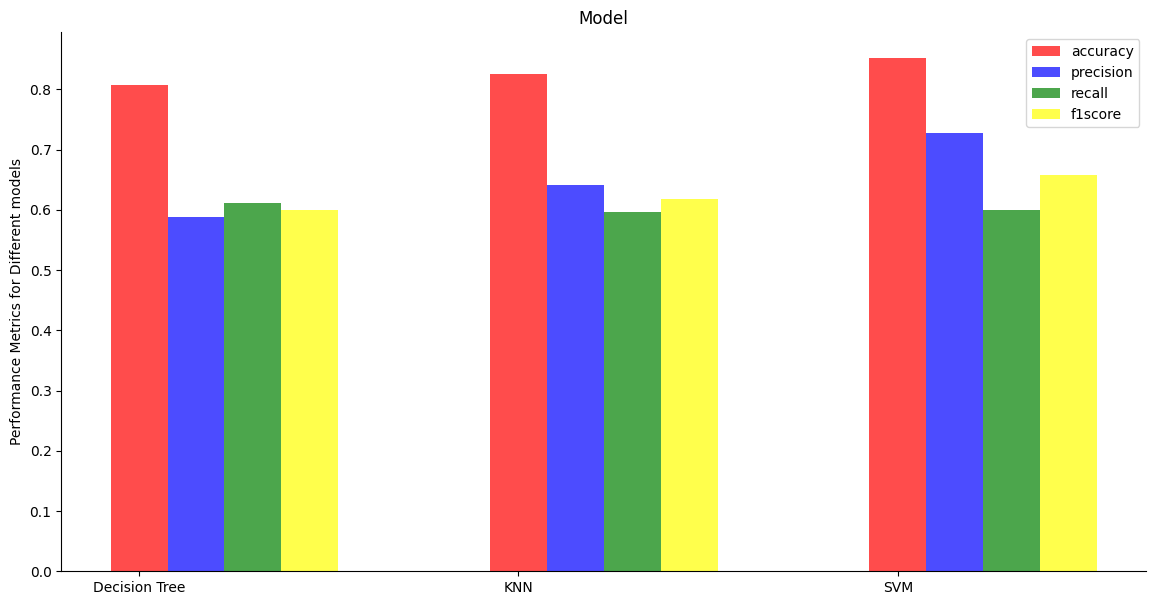

In [ ]:
plt.figure(figsize=(14, 7))

models = ['Decision Tree', 'KNN', 'SVM']
model = np.arange(len(models))

ax = plt.subplot(111)
values = [accuracy_score(y_test, y_dt_predicted), accuracy_score(y_test, y_knn_predicted), accuracy_score(y_test, y_svm_predicted)]
plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           
         
ax = plt.subplot(111)
values = [precision_score(y_test, y_dt_predicted), precision_score(y_test, y_knn_predicted), precision_score(y_test, y_svm_predicted)]
plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)


ax = plt.subplot(111)
values = [recall_score(y_test, y_dt_predicted), recall_score(y_test, y_knn_predicted), recall_score(y_test, y_svm_predicted)]
plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)


ax = plt.subplot(111)
values = [f1_score(y_test, y_dt_predicted), f1_score(y_test, y_knn_predicted), f1_score(y_test, y_svm_predicted)]
plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'yellow', label = 'f1score')
plt.xticks(model, models)


plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

As we can see in the results and specially in this plot, except recall which SVM and KNN have almost equal result and decision tree is a bit better, in all other metrics SVM is better than KNN and they are both better than decision tree. so at all we can say that SVM had better result on our data.